# Anomaly Detection - KDD'99 Dataset

In week 4 of the inzva Applied AI program we will spend most of our time on Anomaly Detection techniques. 

**This notebook includes**

*1- Isolation Forest*

*2- Local Outlier Factor*

*3- Autoencoder*

*4 - XGBoosting*

We first start with obtaining the data and creating training and test sets. In this notebook, we create our models only for Probing attack detection.



## 1. Data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import pandas as pd
kdd = pd.read_csv('/content/gdrive/My Drive/kddcup.data/kdd.csv')

In [5]:
kdd = kdd.iloc[:,1:43]

In [6]:
kdd = kdd.drop(['Protocol Type', 'Service', 'Flag'], axis = 1)


In [7]:
kdd_train = kdd.iloc[0:102563, :]

In [8]:
kdd_test = kdd.iloc[102563:183737, :]

In [13]:
kdd_train_probe = kdd_train[(kdd_train.Type_Groups == 'Normal') | (kdd_train.Type_Groups == 'Probe')]

In [14]:
kdd_test_probe = kdd_test[(kdd_test.Type_Groups == 'Normal') | (kdd_test.Type_Groups == 'Probe')]

Normals are encoded as 1, anomalies are encoded as -1. Use this version if you want to apply Isolation Forest or Local Outlier Factor. Otherwise, please run the code in the next chunk.

In [12]:
import numpy as np

kdd_train_probe['Type_Groups'] = np.where(kdd_train_probe['Type_Groups'] == 'Normal', 1, -1)
kdd_test_probe['Type_Groups'] = np.where(kdd_test_probe['Type_Groups'] == 'Normal', 1, -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
kdd_train_probe['Type_Groups'] = np.where(kdd_train_probe['Type_Groups'] == 'Normal', 0, 1)
kdd_test_probe['Type_Groups'] = np.where(kdd_test_probe['Type_Groups'] == 'Normal', 0, 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 1.1 Isolation Forest

In [ ]:
x_train = kdd_train_probe.drop(['Type_Groups'], axis = 1)
y_train = kdd_train_probe['Type_Groups']

In [ ]:
x_test = kdd_test_probe.drop(['Type_Groups'], axis = 1)
y_test = kdd_test_probe['Type_Groups']

In [ ]:
clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.15, n_estimators=100, n_jobs=-1)

In [ ]:
clfIF.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.15,
                max_features=1.0, max_samples=0.25, n_estimators=100, n_jobs=-1,
                random_state=11, verbose=0, warm_start=False)

In [ ]:
y_pred_train = clfIF.predict(x_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [ ]:
np.unique(y_pred_train)

array([-1,  1])

In [ ]:
conf_matrix = confusion_matrix(y_train, y_pred_train)
conf_matrix

array([[ 3996,   111],
       [11212, 86066]])

In [ ]:
y_pred_test = clfIF.predict(x_test)
conf_matrix_if_test = confusion_matrix(y_test, y_pred_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [ ]:
conf_matrix_if_test

array([[ 4163,     3],
       [ 8200, 52393]])

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.34      1.00      0.50      4166
           1       1.00      0.86      0.93     60593

    accuracy                           0.87     64759
   macro avg       0.67      0.93      0.72     64759
weighted avg       0.96      0.87      0.90     64759



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
import seaborn as sns


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

def plot_confusion_matrix(cm, title, classes=['abnormal', 'normal'],
                          cmap=plt.cm.Blues, save=False, saveas="MyFigure.png"):
    
    # print Confusion matrix with blue gradient colours
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if save:
        plt.savefig(saveas, dpi=100)


## 1.3 Local Outlier Factor

In [ ]:
clfLOF = LocalOutlierFactor(n_neighbors=15, metric='euclidean', algorithm='auto', contamination=0.15, n_jobs=-1)
clfLOF.fit(x_train, y_train)

LocalOutlierFactor(algorithm='auto', contamination=0.15, leaf_size=30,
                   metric='euclidean', metric_params=None, n_jobs=-1,
                   n_neighbors=15, novelty=False, p=2)

In [ ]:
y_pred_train_lof = clfLOF.fit_predict(x_train, y_train)

In [ ]:
conf_matrix_lof = confusion_matrix(y_train, y_pred_train_lof)
conf_matrix_lof

array([[  546,  3561],
       [14662, 82616]])

In [ ]:
y_pred_test_lof = clfLOF.fit_predict(x_test, y_test)
conf_matrix_lof_test = confusion_matrix(y_test, y_pred_test_lof)
conf_matrix_lof_test

array([[ 1082,  3084],
       [ 8632, 51961]])

In [ ]:
print(classification_report(y_test, y_pred_test_lof))

              precision    recall  f1-score   support

          -1       0.11      0.26      0.16      4166
           1       0.94      0.86      0.90     60593

    accuracy                           0.82     64759
   macro avg       0.53      0.56      0.53     64759
weighted avg       0.89      0.82      0.85     64759



## 1.4 Autoencoder

In [ ]:
import pickle
from scipy import stats
import tensorflow as tf
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

Using TensorFlow backend.


## 1.4.1 Probing Attack Detection

## We need to create Validation Test

In [ ]:
kdd_test_probe.groupby('Type_Groups').count()

,Duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
Type_Groups,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593
1,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166


In [ ]:
kdd_test_probe.iloc[14000:34000,:].groupby('Type_Groups').count()

,Duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
Type_Groups,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756
1,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244


In [ ]:
kdd_valid_probe = kdd_test_probe.iloc[14000:34000,:]

In [ ]:
kdd_test_v2_probe = pd.concat([kdd_test_probe.iloc[0:14000,:], kdd_test_probe.iloc[34001:64759,:]])

In [ ]:
kdd_test_v2_probe.groupby('Type_Groups').count()

,Duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
Type_Groups,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836
1,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922


Now that we obtained Train, Test and Validation sets, we can train our data and optimize the reconstruction error threshold using test set. Then, we will perform our actual prediction tast by using Validation set.

In [ ]:
X_train, X_test = kdd_train_probe, kdd_test_v2_probe
X_train = X_train[X_train.Type_Groups == 0]
X_train = X_train.drop(['Type_Groups'], axis=1)
y_test = X_test['Type_Groups']
X_test = X_test.drop(['Type_Groups'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(97278, 38)

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder_corr = Model(inputs=input_layer, outputs=decoder)

In [ ]:
nb_epoch = 34
batch_size = 100
batch_index=0
autoencoder_corr.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",  #TO SAVE THE MODEL
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder_corr.fit(X_train, X_train, #INPUT AND EXPECTED OUTPUT ARE THE SAME.
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 97278 samples, validate on 44758 samples
Epoch 1/34
97278/97278 [==============================] - 2s 20us/step - loss: 0.2374 - acc: 0.8362 - val_loss: 0.5413 - val_acc: 0.3169
Epoch 2/34
97278/97278 [==============================] - 2s 19us/step - loss: 0.2344 - acc: 0.8472 - val_loss: 0.5866 - val_acc: 0.3196
Epoch 3/34
97278/97278 [==============================] - 2s 18us/step - loss: 0.2329 - acc: 0.8412 - val_loss: 0.6006 - val_acc: 0.4627
Epoch 4/34
97278/97278 [==============================] - 2s 18us/step - loss: 0.2317 - acc: 0.8425 - val_loss: 0.5600 - val_acc: 0.4225
Epoch 5/34
97278/97278 [==============================] - 2s 18us/step - loss: 0.2302 - acc: 0.8471 - val_loss: 0.5684 - val_acc: 0.5104
Epoch 6/34
97278/97278 [==============================] - 2s 18us/step - loss: 0.2294 - acc: 0.8426 - val_loss: 0.5754 - val_acc: 0.4567
Epoch 7/34
97278/97278 [==============================] - 2s 19us/step - loss: 0.2287 - acc: 0.8485 - val_loss: 0.5865 - val_acc

# Tune the threshold value using training set

In [ ]:
predictions = autoencoder_corr.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,44758.000000,44758.000000
mean,0.505508,0.065284
std,6.349874,0.247030
min,0.019695,0.000000
25%,0.042431,0.000000
50%,0.087384,0.000000
75%,0.131483,0.000000
max,1136.353221,1.000000


In [ ]:
threshold = np.arange(0, 1, 0.01)
results = np.zeros(100)
probe = np.zeros(100)
i = 0
for t in threshold:
  y_pred = [1 if e > t else 0 for e in error_df.reconstruction_error.values]
  conf_matrix = confusion_matrix(error_df.true_class, y_pred)
  results[i] = (conf_matrix[0,0] + conf_matrix[1,1]) / 64759
  probe[i] = conf_matrix[1,1] / 4166
  i = i + 1

In [ ]:
predictions = autoencoder_corr.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,44758.000000,44758.000000
mean,0.505508,0.065284
std,6.349874,0.247030
min,0.019695,0.000000
25%,0.042431,0.000000
50%,0.087384,0.000000
75%,0.131483,0.000000
max,1136.353221,1.000000


In [ ]:
threshold = 0.13 # 0.20 de iyi
LABELS = ["Normal", "Probing"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
#plt.figure(figsize=(12, 12))
#sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
#plt.title("Confusion matrix")
#plt.ylabel('True class')
#plt.xlabel('Predicted class')
#plt.show()
conf_matrix

array([[33291,  8545],
       [    0,  2922]])

In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

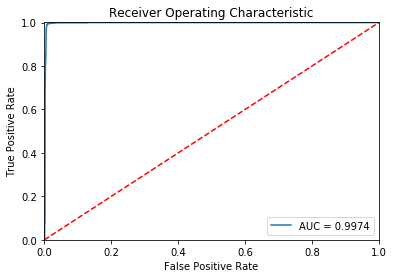

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [ ]:
threshold = np.arange(0, 1, 0.01)
results = np.zeros(100)
probe = np.zeros(100)
i = 0
for t in threshold:
  y_pred = [1 if e > t else 0 for e in error_df.reconstruction_error.values]
  conf_matrix = confusion_matrix(error_df.true_class, y_pred)
  results[i] = (conf_matrix[0,0] + conf_matrix[1,1]) / 44758
  probe[i] = conf_matrix[1,1] / 2922
  i = i + 1

In [ ]:
probe

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99828884, 0.99828884, 0.99828884,
       0.99828884, 0.99828884, 0.99828884, 0.99828884, 0.99794661,
       0.99760438, 0.99760438, 0.99726215, 0.99726215, 0.99726215,
       0.99726215, 0.99691992, 0.99657769, 0.99623546, 0.99623546,
       0.99623546, 0.99589322, 0.99589322, 0.99589322, 0.99555099,
       0.99520876, 0.99520876, 0.99486653, 0.9945243 , 0.9945243 ,
       0.99418207, 0.99418207, 0.99418207, 0.99418207, 0.99418207,
       0.99418207, 0.99418207, 0.99418207, 0.99418207, 0.99383

In [ ]:
threshold

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

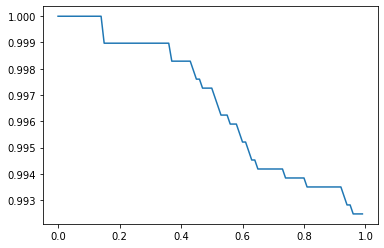

In [ ]:
import matplotlib.pyplot as plt
plt.plot(threshold, probe)

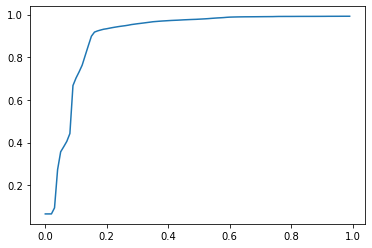

In [ ]:
plt.plot(threshold, results)

Let's try if we can find a better threshold value between 0.14 and 0.18.

In [ ]:
threshold = np.arange(0.3, 0.5, 0.001)
results = np.zeros(200)
probe = np.zeros(200)
i = 0
for t in threshold:
  y_pred = [1 if e > t else 0 for e in error_df.reconstruction_error.values]
  conf_matrix = confusion_matrix(error_df.true_class, y_pred)
  results[i] = (conf_matrix[0,0] + conf_matrix[1,1]) / 44758
  probe[i] = conf_matrix[1,1] / 2922
  i = i + 1

In [ ]:
threshold

array([0.3  , 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308,
       0.309, 0.31 , 0.311, 0.312, 0.313, 0.314, 0.315, 0.316, 0.317,
       0.318, 0.319, 0.32 , 0.321, 0.322, 0.323, 0.324, 0.325, 0.326,
       0.327, 0.328, 0.329, 0.33 , 0.331, 0.332, 0.333, 0.334, 0.335,
       0.336, 0.337, 0.338, 0.339, 0.34 , 0.341, 0.342, 0.343, 0.344,
       0.345, 0.346, 0.347, 0.348, 0.349, 0.35 , 0.351, 0.352, 0.353,
       0.354, 0.355, 0.356, 0.357, 0.358, 0.359, 0.36 , 0.361, 0.362,
       0.363, 0.364, 0.365, 0.366, 0.367, 0.368, 0.369, 0.37 , 0.371,
       0.372, 0.373, 0.374, 0.375, 0.376, 0.377, 0.378, 0.379, 0.38 ,
       0.381, 0.382, 0.383, 0.384, 0.385, 0.386, 0.387, 0.388, 0.389,
       0.39 , 0.391, 0.392, 0.393, 0.394, 0.395, 0.396, 0.397, 0.398,
       0.399, 0.4  , 0.401, 0.402, 0.403, 0.404, 0.405, 0.406, 0.407,
       0.408, 0.409, 0.41 , 0.411, 0.412, 0.413, 0.414, 0.415, 0.416,
       0.417, 0.418, 0.419, 0.42 , 0.421, 0.422, 0.423, 0.424, 0.425,
       0.426, 0.427,

In [ ]:
probe

array([0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99897331, 0.99897331, 0.99897331, 0.99897331,
       0.99897331, 0.99828884, 0.99828884, 0.99828884, 0.99828884,
       0.99828884, 0.99828884, 0.99828884, 0.99828884, 0.99828

In [ ]:
results

array([0.95732606, 0.95759417, 0.95779525, 0.95790697, 0.95810805,
       0.95819742, 0.9583985 , 0.9585549 , 0.95873363, 0.95893472,
       0.95902409, 0.95920282, 0.95931454, 0.9595603 , 0.95976138,
       0.95998481, 0.96023057, 0.96027526, 0.96054337, 0.96076679,
       0.96085616, 0.9610349 , 0.96121364, 0.96141472, 0.96166049,
       0.96183922, 0.96208499, 0.9621967 , 0.96237544, 0.96257652,
       0.96273292, 0.96286697, 0.96297869, 0.96329148, 0.96340319,
       0.96369364, 0.96385004, 0.96405112, 0.96422986, 0.96443094,
       0.96460968, 0.96496716, 0.96525761, 0.96548103, 0.96559274,
       0.96581617, 0.96599491, 0.96617364, 0.96633004, 0.9664641 ,
       0.96659815, 0.96670986, 0.96677689, 0.96693329, 0.967045  ,
       0.96720139, 0.96731311, 0.96749185, 0.96758121, 0.96771527,
       0.96780464, 0.96789401, 0.9680504 , 0.96827383, 0.96831851,
       0.96838554, 0.96851959, 0.96858662, 0.96863131, 0.9687877 ,
       0.96896644, 0.96903347, 0.96914518, 0.96930158, 0.96936

Let's fix our threshold value to 0.499 and apply it to Validation Set.

In [ ]:
X_valid = kdd_valid_probe
y_valid = X_valid['Type_Groups']
X_valid = X_valid.drop(['Type_Groups'], axis=1)
X_valid = X_valid.values

In [ ]:
predictions = autoencoder_corr.predict(X_valid)
mse = np.mean(np.power(X_valid - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_valid})
error_df.describe()

,reconstruction_error,true_class
count,20000.000000,20000.000000
mean,0.553160,0.062200
std,19.441038,0.241524
min,0.019957,0.000000
25%,0.041338,0.000000
50%,0.086328,0.000000
75%,0.131369,0.000000
max,1940.447577,1.000000


In [ ]:
threshold = 0.499 # 0.20 de iyi
LABELS = ["Normal", "Probing"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
conf_matrix

array([[18290,   466],
       [   94,  1150]])

## XGBoosting

In [27]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import time

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [16]:
kdd_train_probe.head()

,Duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type_Groups
0,-0.150103,-0.004917,0.019931,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.112107,-0.125503,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-1.336229,-1.990255,0.536542,-0.34644,-0.154032,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,0
1,-0.150103,-0.004890,-0.048616,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.112107,-0.125503,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-1.240464,-1.882796,0.536542,-0.34644,-0.346801,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,0
2,-0.150103,-0.004892,-0.036865,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.112107,-0.125503,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-1.144700,-1.775337,0.536542,-0.34644,-0.411057,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,0
3,-0.150103,-0.004899,-0.036865,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.145850,-0.218540,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-1.048936,-1.667879,0.536542,-0.34644,-0.411057,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,0
4,-0.150103,-0.004900,-0.027268,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.145850,-0.218540,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-0.953172,-1.560420,0.536542,-0.34644,-0.443185,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,0


In [25]:
def xgb_classifier(X_train, X_test, y_train, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    """
    # {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3} 0.862920874517388
    # {'colsample_bytree': 1.0, 'gamma': 0.2} 0.871
    # {'gamma': 0.2, 'scale_pos_weight': 1} 0.8702009952422571
    # {'subsample': 0.6} 0.864310306628855
    """
    alg = XGBClassifier(learning_rate=0.1, 
                        n_estimators=140, 
                        max_depth=5, # maximum number of features used in each tree
                        min_child_weight=3, 
                        gamma=0.2, 
                        subsample=0.6, #hich is for each tree the % of rows taken to build the tree. 
                                        #I recommend not taking out too many rows, as performance will drop a lot. Take values from 0.8 to 1.
                        colsample_bytree=1.0, # number of columns used by each tree. 
                        #In order to avoid some columns to take too much credit for the prediction 
                        #(think of it like in recommender systems when you recommend the most purchased products
                        #and forget about the long tail), take out a good proportion of columns. 
                        #Values from 0.3 to 0.8 if you have many columns (especially if you did one-hot encoding), 
                        #or 0.8 to 1 if you only have a few columns.
                        objective='binary:logistic', 
                        nthread=4, 
                        scale_pos_weight=1, 
                        seed=27)

    if useTrainCV:
        print("Start Feeding Data")
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        # xgtest = xgb.DMatrix(X_test.values, label=y_test.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    # 
    print('Start Training')
    alg.fit(X_train, y_train, eval_metric='auc')

    # param_test1 = {}
    # gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
    #                                                 min_child_weight=3, gamma=0.2, subsample=0.8,
    #                                                 colsample_bytree=1.0,
    #                                                 objective='binary:logistic', nthread=4, scale_pos_weight=1,
    #                                                 seed=27),
    #                         param_grid=param_test1,
    #                         scoring='f1',
    #                         n_jobs=4, iid=False, cv=5)
    # gsearch1.fit(X_train, y_train)
    # print(gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_)

    # 
    print("Start Predicting")
    predictions = alg.predict(X_test)
    pred_proba = alg.predict_proba(X_test)[:, 1]

    # 
    print("\nResulting Metrics")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))
    print("AUC : %f" % metrics.roc_auc_score(y_test, pred_proba))
    print("F1 Score : %f" % metrics.f1_score(y_test, predictions))

    feat_imp = alg.feature_importances_
    feat = X_train.columns.tolist()
    # clf.best_estimator_.booster().get_fscore()
    res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
    res_df.plot('Features', 'Importance', kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()
    print(res_df)
    print(res_df["Features"].tolist())


In [17]:
y_train = kdd_train_probe['Type_Groups']

In [18]:
X_train = kdd_train_probe.drop(['Type_Groups'], axis = 1)

In [19]:
y_test = kdd_test_probe['Type_Groups']
X_test = kdd_test_probe.drop(['Type_Groups'], axis = 1)

Start Feeding Data
Start Training
Start Predicting


Acc : 0.9622
AUC : 0.985972
F1 Score : 0.745770


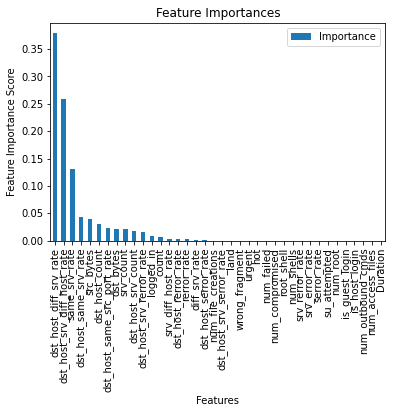

                       Features  Importance
31       dst_host_diff_srv_rate    0.378640
33  dst_host_srv_diff_host_rate    0.257967
25                same_srv_rate    0.130783
30       dst_host_same_srv_rate    0.043607
1                     src_bytes    0.039829
28               dst_host_count    0.030115
32  dst_host_same_src_port_rate    0.022549
2                     dst_bytes    0.020976
20                    srv_count    0.020545
29           dst_host_srv_count    0.017389
37     dst_host_srv_rerror_rate    0.015460
8                     logged_in    0.008047
19                        count    0.005843
27           srv_diff_host_rate    0.002685
36         dst_host_rerror_rate    0.002516
23                  rerror_rate    0.002228
26                diff_srv_rate    0.000606
34         dst_host_serror_rate    0.000214
13           num_file_creations    0.000000
35     dst_host_srv_serror_rate    0.000000
3                          land    0.000000
4                wrong_fragment 

In [28]:
xgb_classifier(X_train, X_test, y_train, y_test)